In [67]:
%matplotlib inline  

import pandas as pd
import pandas_highcharts.core
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot 



import os
nce

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings
from home.management.commands.load_data import rename_cols, assign_state_lga_num

import django
django.setup()

from home.models import Site

In [32]:
# !pip install matplotlib

In [33]:
engine = create_engine(
    'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{NAME}'.format(**settings.DATABASES['default']))
df = pd.read_sql_query("select * from program;", con=engine)

In [34]:
df.weeknum.unique()

array([u'42', u'26', u'23', u'22', u'24', u'25', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38',
       u'39', u'40', u'41', u'43', u'44', u'45', u'46', u'47', u'48',
       u'49', u'50', u'51', u'52', u'1', u'2', u'3', u'4', u'5', u'6',
       u'Pro', u'PRO', u'53', u'54', u'14', u'P', u'Reg', u'Y', u'18',
       u'11', u'21', u'20', u'19', u'7', u'82', u'Same', u'REGISTRATION',
       u'70', u'15', u'10',
       u'No peament for rapid pro treaning no report.',
       u'You have send SMS training  allaunces to anyone except me', u'N',
       u'No', u'.32', u'197',
       u'You a not sending data with pay for the traning',
       u'I WILL NOT SEND REPORT UNTILL OUR TRENING MONEY HAS PAID', u'Pso',
       u'222', u'56', u'1.5', u'9', u'YES', u'0', u'Week', u'215', u'Yes',
       u'SaAM', u'NO', u'STO', u'Death', u'S', u'8', u'Sto', u'WEEK49',
       None, u'252', u'N ', u'PRO   ', u'Valid', u'y',
       u'Why charging my report', u'.31', u'84',

In [37]:
df['amar'].groupby(df['weeknum']).mean()

weeknum
0.000000e+00          NaN
3.100000e-01          NaN
3.200000e-01          NaN
4.200000e-01          NaN
1.000000e+00     8.101100
1.500000e+00          NaN
2.000000e+00     8.933695
3.000000e+00     9.318693
4.000000e+00     9.761957
5.000000e+00     9.738506
5.100000e+00     3.000000
6.000000e+00    11.715686
7.000000e+00    12.733333
8.000000e+00    19.166667
9.000000e+00    40.000000
1.000000e+01    23.400000
1.100000e+01    11.000000
1.200000e+01     2.000000
1.300000e+01    25.000000
1.400000e+01    25.750000
1.500000e+01    10.000000
1.600000e+01    21.333333
1.700000e+01          NaN
1.800000e+01    30.166667
1.900000e+01     3.000000
2.000000e+01    10.666667
2.100000e+01     4.500000
2.200000e+01    13.287879
2.300000e+01    11.342246
2.400000e+01    12.026144
                  ...    
4.900000e+01    15.222513
5.000000e+01    13.316151
5.100000e+01    12.220791
5.200000e+01    10.840901
5.210000e+01     0.000000
5.300000e+01    11.962963
5.400000e+01          NaN
5.60

In [38]:
# df[df.amar in map(str, range(10))]

# df[(df.A == 1) & (df.D == 6)] 
# df[(df.amar.to_int>=0)]

# Convert to int
df['amar'] = pd.to_numeric(df.amar, errors='coerce')
df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')

In [39]:
df_filtered = df.query('weeknum==weeknum').query('0<weeknum<53')
df_filtered['weeknum'] = df_filtered.weeknum.astype('int')
df_filtered.weeknum.unique()
# df_filtered

array([42, 26, 23, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,
        4,  5,  6, 14, 18, 11, 21, 20, 19,  7, 15, 10,  0,  9,  8, 16, 12,
       13, 17])

In [40]:
df_filtered = df_filtered.query('amar==amar').query('0<amar<99999')
df_filtered['amar'] = df_filtered.amar.astype('int')
df_filtered.amar.unique()


array([  10,    8,   13,   14,   17,    6,   20,   15,   22,   27,   21,
         24,   23,   18,    5,    7,   16,   32,   36,  101,    9,   19,
         33,   88,   12,    4,   11,   28,   25,  208,   79,   37,    2,
          1,    3,   60,   26,   48,  118,  345,  323,   31,   47,  113,
         46,  108,   59,   51,  153,   86,   77,   75,   56,   34,   39,
         45,   50,   52,   44,   98,  268,  100,  203,    0,   61,   29,
        105,   96,  102,   69,   85,   80,   30,   41,   58,  241,   35,
         82,  115,   38,  106,  112,  134,  162,  146,   81,   66,   40,
         67,   43,   42,  219,  173,  171,  300,  351,  139,  151,   87,
         93,   95,   54,   55,   71,  522,   78,   70,   84,  109,   65,
         91,   74, 1226, 1450,   49,  131,   62,   97,   83,  123,  163,
        114,  125,   90,   99,  144,  135,  142,   76,   53,  242,  284,
        209,  120,  226,  215,  157,   72,  328,  316,  492,  140,  126,
         57,   63,  132,  330,   64,  103,  462,  1

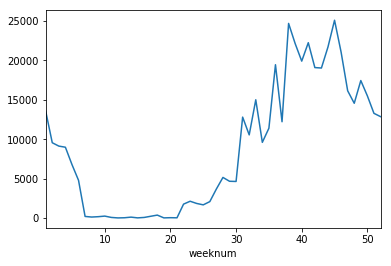

In [41]:
df_filtered = assign_state_lga_num(df_filtered)
adm_by_week = df_filtered['amar'].groupby(df_filtered['weeknum']).sum()

adm_by_week.plot()

In [42]:
# data cleaning on state num
df_filtered['state_num'] = pd.to_numeric(df_filtered.state_num, errors='coerce')
df_filtered = df_filtered.query('state_num==state_num').query('0<state_num<37')
df_filtered['state_num'] = df_filtered.state_num.astype('int')
df_filtered.state_num.unique()

array([33, 35, 36,  1, 16,  5, 17, 18,  8,  2, 20, 21, 22, 19,  3])

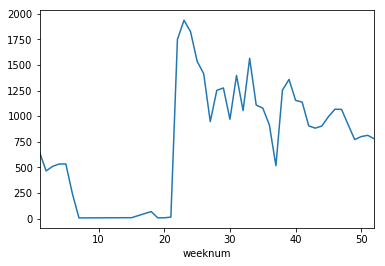

In [43]:
adm_by_week = df_filtered.query('state_num==33')['amar'].groupby(df_filtered['weeknum']).sum()

adm_by_week.plot()

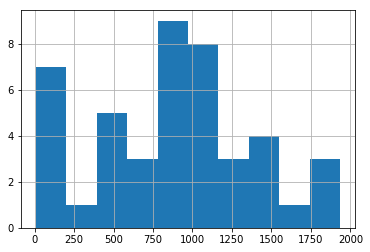

In [44]:
adm_by_week.hist()

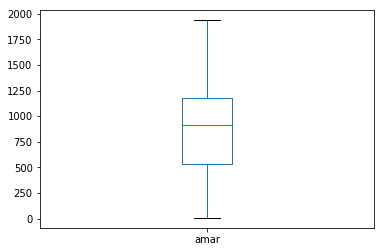

In [45]:
adm_by_week.plot(kind="box")

In [46]:
chart = pandas_highcharts.core.serialize(adm_by_week.to_frame(), render_to='my-chart',output_type='json')
chart

'{"series":[{"data":[[1,649],[2,466],[3,511],[4,534],[5,534],[6,244],[7,8],[14,10],[15,10],[18,70],[19,9],[20,9],[21,16],[22,1748],[23,1935],[24,1823],[25,1535],[26,1414],[27,947],[28,1252],[29,1275],[30,970],[31,1397],[32,1054],[33,1564],[34,1108],[35,1079],[36,915],[37,517],[38,1254],[39,1358],[40,1154],[41,1137],[42,905],[43,883],[44,904],[45,995],[46,1068],[47,1066],[48,918],[49,772],[50,801],[51,813],[52,778]],"name":"amar","yAxis":0}],"yAxis":[{}],"chart":{"renderTo":"my-chart"},"xAxis":{"title":{"text":"weeknum"}},"legend":{"enabled":true}}'

In [47]:
"12".isdigit()

True

In [48]:
"something".isdigit()

False

In [49]:
# Assign state and LGA numbers to data frame
df = assign_state_lga_num(df)


In [50]:
# Convert to float
df['amar'] = pd.to_numeric(df.amar, errors='coerce')
df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')
df['state_num'] = pd.to_numeric(df.state_num, errors='coerce')
df['lga_num'] = pd.to_numeric(df.lga_num, errors='coerce')

In [51]:
# Clean out of range data
df_filtered = df.query('weeknum==weeknum').query('0<weeknum<53')
df_filtered = df_filtered.query('amar==amar').query('0<amar<99999')
df_filtered = df_filtered.query('state_num==state_num').query('0<state_num<37')
df_filtered = df_filtered.query('lga_num==lga_num').query('101<lga_num<3799')

In [52]:
# Set to int - so that decimal points are not presented
df_filtered['weeknum'] = df_filtered.weeknum.astype('int')
df_filtered['amar'] = df_filtered.amar.astype('int')
df_filtered['state_num'] = df_filtered.state_num.astype('int')
df_filtered['lga_num'] = df_filtered.lga_num.astype('int')

In [53]:
adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()


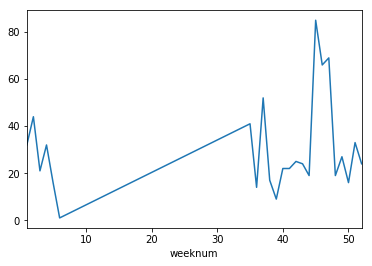

In [54]:
adm_by_week.plot()

In [55]:
print len(list(adm_by_week))
print len(adm_by_week)
adm_by_week.index

24
24


Int64Index([ 1,  2,  3,  4,  5,  6, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
            46, 47, 48, 49, 50, 51, 52],
           dtype='int64', name=u'weeknum')

In [56]:
list(zip(adm_by_week.index, adm_by_week.values.tolist()))

[(1, 32),
 (2, 44),
 (3, 21),
 (4, 32),
 (5, 16),
 (6, 1),
 (35, 41),
 (36, 14),
 (37, 52),
 (38, 17),
 (39, 9),
 (40, 22),
 (41, 22),
 (42, 25),
 (43, 24),
 (44, 19),
 (45, 85),
 (46, 66),
 (47, 69),
 (48, 19),
 (49, 27),
 (50, 16),
 (51, 33),
 (52, 24)]

In [57]:
y = 1 
x = getattr(df.state_name, df.siteid[y])
    
print x

AttributeError: 'DataFrame' object has no attribute 'state_name'

In [ ]:
# read from sql table siteids
df = pd.read_sql_query("select * from siteid;", con=engine)


In [ ]:
list(df)

In [ ]:
df.sitename.unique()

In [ ]:
df.siteid.unique()

In [58]:
x = Siteid.site_name[0]
print x

NameError: name 'Siteid' is not defined

In [ ]:
# Assign name to name_of_selected to output the name of the selected site
name_of_selected = "no name"


In [ ]:
Siteid = {"siteid": 1, "sitename": "Murtala"}

In [ ]:
data_type = "site"

In [ ]:
if data_type == "site":
    name_of_selected = Siteid.get("sitename")

In [ ]:
print name_of_selected 

In [ ]:
columnsTitles = ['state_num', 'state']
first_admin_df = df.reindex(columns=columnsTitles)

In [ ]:
# sort
# first_admin_df = = first_admin_df.sort(['state_num'], ascending=[1], inplace='True')
first_admin_df = first_admin_df.sort(['state_num'], ascending=[1])

In [ ]:
# drop duplicates
first_admin_df.drop_duplicates()

In [ ]:
# Second Admin
columnsTitles = ['lga_num', 'lga', 'state_num']
second_admin_df = df.reindex(columns=columnsTitles)

In [ ]:
# drop duplicates
second_admin_df.drop_duplicates()

In [ ]:
second_admin_df.reset_index()
#del.second_admin_df.index

In [63]:
df_filtered['amar'].groupby(df_filtered['siteid']).sum()

siteid
1604110008     715
1604110026     562
1604110045     765
1604110052     895
1604110053     806
1606110023     562
1606110026     547
1606110027    1072
1606110028    1174
1606110033     466
1609           763
1609110004     464
1609110007     615
1609110017     494
1609110021     184
1609110022      39
1609110026     813
1702110002    1466
1702110006    1258
1702110010    2968
1702110014    2849
1702110018    6488
1702210001     223
1703110007    1485
1703110012    1527
1703110023    1540
1703110025    1623
1703110030    3383
1703110032    1722
1703110036    1728
              ... 
821110027      289
821110028        4
821110029      724
821110030      601
821110031      200
821110032      350
821110033      264
821110034      168
821110035      467
821110036      164
821210017        4
824110002      398
824110004       42
824110020        4
824110024        4
824110025       18
825110005      862
825110010     1083
827!!00!3       39
827110001      291
827110004      254
82711

In [92]:
Site.objects.get(siteid=1606110027)

<Site: Site Nassarawo Maternity Clinic>

In [89]:
df_filtered['siteid'] = pd.to_numeric(df_filtered.siteid, errors='coerce')
df_filtered = df_filtered.query('siteid==siteid')
df_filtered['siteid'] = df_filtered.siteid.astype('int')

In [90]:
# df_filtered.query('siteid==%s' % 1606110027)['amar'].groupby(df_filtered['weeknum']).sum()

df_filtered["siteid"].unique()

array([      3313, 3308110010, 3304110025, 3308110033, 3304110028,
       3304110010, 3308110038, 3308110018, 3304110003, 3313110040,
       3313110028,       3306, 3304110019, 3308110015, 3313110037,
       3313110029, 3313110007, 3305110007, 3306110011, 3306110019,
             3503, 3306110017, 3319110025, 3306110015, 3319110014,
       3305110018,       3305, 3305110027, 3319110016, 3305110024,
       3305110017, 3319110031, 3306110001, 3319110029, 3317210028,
       3301210002, 3317110023, 3301110008, 3319210011, 3317110012,
       3317110007, 3316210012, 3317110011, 3301110015, 3301110011,
       3308210004, 3321110043, 3313110033, 3317220020, 3321110023,
       3301110021, 3321110020, 3301110017, 3321110015, 3304210004,
       3321110001, 3317110009, 3321310007, 3609110014, 1606110026,
       1604110026, 1606110028, 1609110017, 1604110053, 1609110007,
       1606110027,       1609, 1606110023, 1604110008, 1604110045,
       1606110033, 1604110052, 1609110022, 1609110021, 1609110

In [93]:
for i in df_filtered["siteid"].unique():
    try:
        if len(df_filtered.query('siteid==%s' % i)) > 0:
            print i
    except SyntaxError:
        pass

3313
3308110010
3304110025
3308110033
3304110028
3304110010
3308110038
3308110018
3304110003
3313110040
3313110028
3306
3304110019
3308110015
3313110037
3313110029
3313110007
3305110007
3306110011
3306110019
3503
3306110017
3319110025
3306110015
3319110014
3305110018
3305
3305110027
3319110016
3305110024
3305110017
3319110031
3306110001
3319110029
3317210028
3301210002
3317110023
3301110008
3319210011
3317110012
3317110007
3316210012
3317110011
3301110015
3301110011
3308210004
3321110043
3313110033
3317220020
3321110023
3301110021
3321110020
3301110017
3321110015
3304210004
3321110001
3317110009
3321310007
3609110014
1606110026
1604110026
1606110028
1609110017
1604110053
1609110007
1606110027
1609
1606110023
1604110008
1604110045
1606110033
1604110052
1609110022
1609110021
1609110004
512110040
513110017
504110027
504110033
512110003
504210004
513110042
513210023
512110044
513110028
512110027
504110010
513110003
512210018
504110020
512110020
513110021
504110035
1704110015
1720110002
170

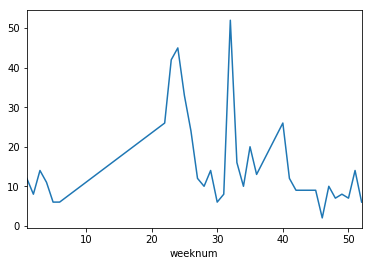

In [101]:
df_filtered.query('siteid==%s' % 3308110038)['amar'].groupby(df_filtered['weeknum']).sum().plot()

In [103]:
Site.objects.get(siteid=3308110038)

<Site: Site Kalmalo Dispensary>

In [104]:
df_filtered.head()


,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,dcur,dead,defu,dmed,tout,confirm,unique,siteid_lgt,state_num,lga_num
2,2,343bd73a-ac74-4835-b2e5-13590d61d335,2348081798563,Muhammad Ibrahim.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313,2016-06-28 13:12:56,2016-06-28 13:15:33,26,Site,...,12,0,1,0,0,Yes,2348081798563 2016-06-28 13:12:56,4,33,3313
3,3,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-06-28 13:09:28,2016-06-28 13:19:16,23,Site,...,10,0,0,0,0,Yes,2347032140235 2016-06-28 13:09:28,10,33,3308
4,4,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:20:25,2016-07-10 09:33:28,22,Site,...,15,0,1,0,0,Yes,2347032140235 2016-07-10 09:20:25,10,33,3308
5,5,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:48:19,2016-07-10 10:02:26,23,Site,...,10,0,0,0,0,Yes,2347032140235 2016-07-10 09:48:19,10,33,3308
6,6,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 12:39:12,2016-07-10 12:51:23,24,Site,...,2,0,1,0,0,Yes,2347032140235 2016-07-10 12:39:12,10,33,3308


In [116]:
df_filtered['dcur'] = pd.to_numeric(df_filtered.dcur, errors='coerce')
df_filtered = df_filtered.query('dcur==dcur').query('0<dcur')
df_filtered['dcur'] = df_filtered.dcur.astype(int)
df_filtered['dcur'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    3,    1,   21,   17,  496,   34,  168,
         81,   53,   23,   36,   62,   32,   41,   33,   86,   27,   38,
         45,   49,   40,   48,   37,   47,   46,   42,   67,    0,   35,
         43,   99,   74,   79,   72,   61,   52,  219,   93,   65,   64,
         57,   66,   56,   55,   51,   68,   50,   58,   44,   80,   82,
         75,   78,   84,   60,   70,   89,   92,   77,  125,   54,  185,
         59,   69,   96,   83,   76,   71,   73,  423,  108,   98,   88,
        128,   85,   91,   94,  144,   90,   63,  118,  786,  123,  184,
        186,  193,  201,  130,  110,  124,  142,  288, 1943,  152,   87,
        113,  165,   97,  140,  114,  199,  102,  422,  101,   95,  107,
        120,  104,  100,  150,  196,  146,  166,  161,  121,  214,  194,
        109,  111,  187,  210,  295,  229,  148,  1

In [117]:
df_filtered['dead'] = pd.to_numeric(df_filtered.dead, errors='coerce')
df_filtered = df_filtered.query('dead==dead').query('0<dead')
df_filtered['dead'] = df_filtered.dead.astype(int)
df_filtered['dead'].unique()

array([  15,    1,    8,   22,   10,    3,    2,    4,    9,   12,   21,
         20,   47,   46,   11,    7,    5,    6,    0,   16,   75,  235,
        219,   25,   19,   18,   40,   14,   29,   27,   45,   28,   34,
         39,   23,   96,  124,   33,   90, 1943,   52,   41,  152,   60,
         26,  232,   17,   32,   37,   13,   64,   24,   95,  140,   62,
         49,   44,   54,   36,   35,  265,   51,  162,   48,   30,   50,
         42,  195,   55,   81,   38,   77,   84,  529])

In [118]:
df_filtered['defu'] = pd.to_numeric(df_filtered.defu, errors='coerce')
df_filtered = df_filtered.query('defu==defu').query('0<defu')
df_filtered['defu'] = df_filtered.defu.astype(int)
df_filtered['defu'].unique()

array([  1,  22,  36,  23,   7,   3,   2,  46,   4,   8,  10,  12,   5,
         6,  13,   0,  33,  20, 235,  29, 284,   9,  56,  39,  41,  18,
       104,  40,  49,  89,  34,  21, 170,  17,  11,  15,  16,  26, 232,
        52,  24,  45,  47,  14, 421,  31,  37,  27,  50,  54,  25,  19,
       119,  48,  80,  43, 194, 144,  42,  32, 195,  84,  51])

In [119]:
df_filtered['dmed'] = pd.to_numeric(df_filtered.dmed, errors='coerce')
df_filtered = df_filtered.query('dmed==dmed').query('0<dmed')
df_filtered['dmed'] = df_filtered.dmed.astype(int)
df_filtered['dmed'].unique()

array([ 22,   4,   1,  46,   2,  14,   5,   8,   3,   7,  15, 235,   9,
        12,   6,  56,  19,  18, 786,  78,  51,  52,  55,  77,  41,  20,
        24,  76,  25, 208,  45,  17,  47,  10,  11,  16, 162,  37,   0,
        44,  99,  42,  94, 195,  33,  35,  36,  84,  49,  13])

In [120]:
df_filtered['tout'] = pd.to_numeric(df_filtered.tout, errors='coerce')
df_filtered = df_filtered.query('tout==tout').query('0<tout')
df_filtered['tout'] = df_filtered.tout.astype(int)
df_filtered['tout'].unique()

array([496,  46,   2,  18,   5,   8,  16,   1,   4,  20,  11,  14,  10,
        75,   3,   6,   7, 786,  41,  36, 232,  17,  52,  30,  28,  12,
       208,  45,  47,   0,  50,  37, 187, 172,  26,  48,  23, 195,  13,
        84,  49,  51,   9])

In [122]:
# Default rate
# Numerator - defaults
# Denominator - total exits
df_filtered['total_exits']=df_filtered.dcur.astype(int)+df_filtered.dead+df_filtered.defu+df_filtered.dmed+df_filtered.tout

In [123]:
df_filtered.total_exits.head()

128     1058
736      230
1167      32
1251      62
1253      26
Name: total_exits, dtype: int64

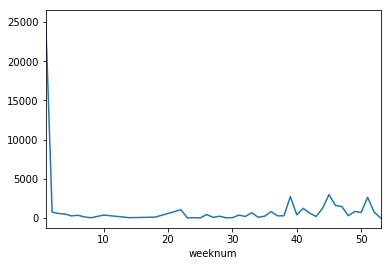

In [124]:
df_filtered['total_exits'].groupby(df_filtered['weeknum']).sum().plot()

In [125]:
df_filtered['default_rate']= df_filtered.defu / df_filtered.total_exits

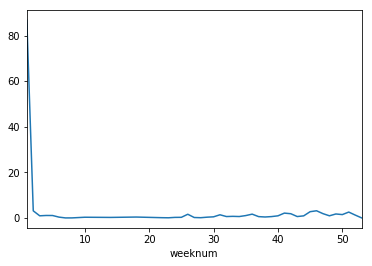

In [126]:
df_filtered['default_rate'].groupby(df_filtered['weeknum']).sum().plot()